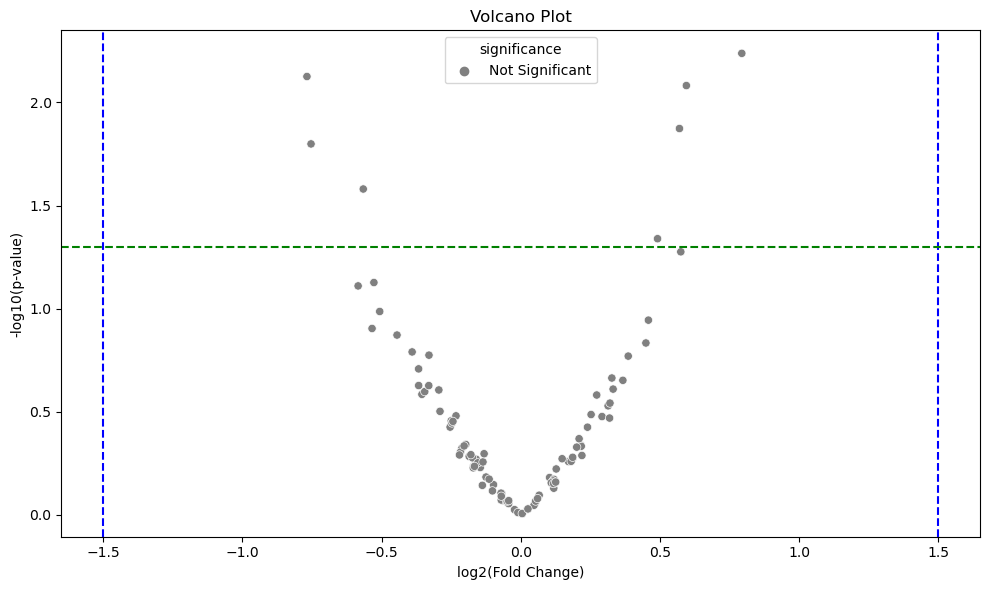

In [8]:
#volcano plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Load data
data = pd.read_csv("cancer_expression.csv")

# Identify control and treatment columns
control_cols = [col for col in data.columns if "Control" in col]
treatment_cols = [col for col in data.columns if "Treatment" in col]

# Calculate mean expression
data['mean_control'] = data[control_cols].mean(axis=1)
data['mean_treatment'] = data[treatment_cols].mean(axis=1)

# Calculate log2 fold change
data['log2FoldChange'] = np.log2(data['mean_treatment'] + 1e-6) - np.log2(data['mean_control'] + 1e-6)

# Perform t-test
ttest_results = ttest_ind(data[treatment_cols], data[control_cols], axis=1, equal_var=False)
data['pvalue'] = ttest_results.pvalue
data['-log10(pvalue)'] = -np.log10(data['pvalue'])

# Classify significance
fc_thresh = 1.5
p_thresh = 0.05
data['significance'] = 'Not Significant'
data.loc[(abs(data['log2FoldChange']) > fc_thresh) & (data['pvalue'] < p_thresh), 'significance'] = 'Significant'

# Plot volcano
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='log2FoldChange', y='-log10(pvalue)', hue='significance',
                palette={'Significant': 'red', 'Not Significant': 'gray'})
plt.axvline(fc_thresh, color='blue', linestyle='--')
plt.axvline(-fc_thresh, color='blue', linestyle='--')
plt.axhline(-np.log10(p_thresh), color='green', linestyle='--')
plt.title("Volcano Plot")
plt.xlabel("log2(Fold Change)")
plt.ylabel("-log10(p-value)")
plt.tight_layout()
plt.show()


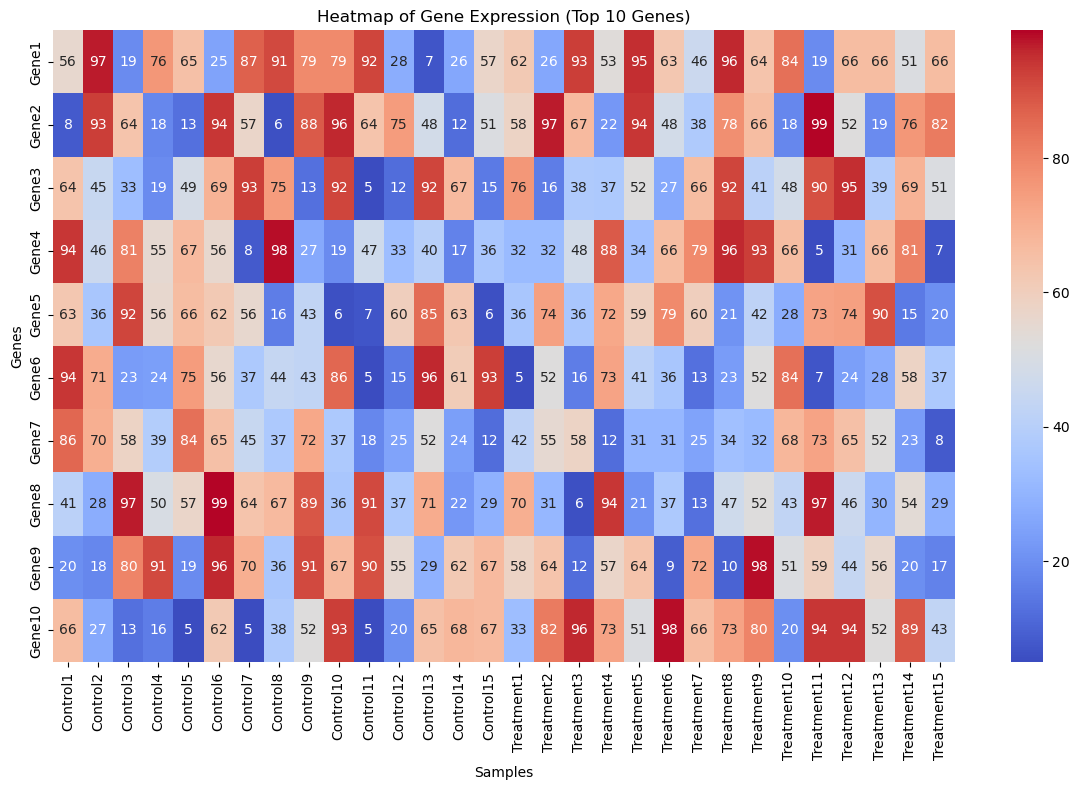

In [9]:
#heat map
# Prepare heatmap data
heatmap_data = data.set_index('Gene')
heatmap_matrix = heatmap_data[control_cols + treatment_cols].head(10)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_matrix, cmap="coolwarm", annot=True)
plt.title("Heatmap of Gene Expression (Top 10 Genes)")
plt.xlabel("Samples")
plt.ylabel("Genes")
plt.tight_layout()
plt.show()


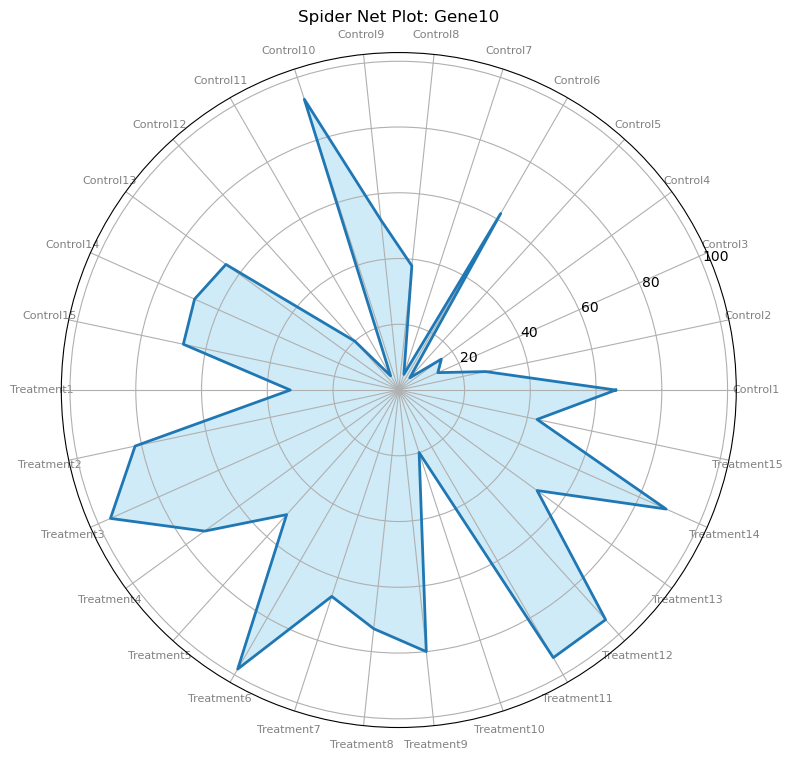

In [10]:
#spider net

from math import pi

# Choose a gene
gene = "Gene10"
gene_row = data[data['Gene'] == gene].iloc[0]
values = gene_row[control_cols + treatment_cols].values

# Create radar chart
labels = control_cols + treatment_cols
num_vars = len(labels)

# Compute angles
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
values = np.append(values, values[0])
angles += angles[:1]

# Plot
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], labels, color='grey', size=8)
ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, 'skyblue', alpha=0.4)
plt.title(f"Spider Net Plot: {gene}")
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

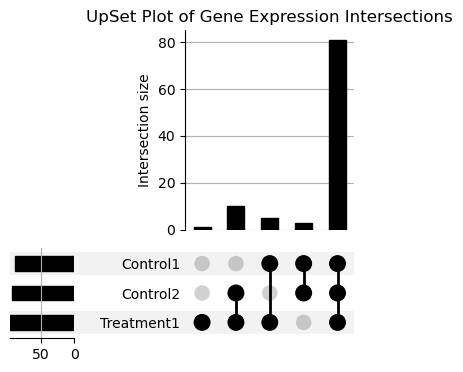

In [1]:
# Step 1: Install required library (if not already installed)
# !pip install upsetplot

# Step 2: Import libraries
import pandas as pd
from upsetplot import UpSet, from_memberships
import matplotlib.pyplot as plt

# Step 3: Load your dataset
data = pd.read_csv("cancer_expression.csv")

# Step 4: Define conditions for gene membership
# Example: genes with high expression in Control1, Control2, Treatment1
threshold = 10  # adjust based on your data scale
memberships = []

for _, row in data.iterrows():
    sets = []
    if row['Control1'] > threshold:
        sets.append('Control1')
    if row['Control2'] > threshold:
        sets.append('Control2')
    if row['Treatment1'] > threshold:
        sets.append('Treatment1')
    memberships.append(sets)

# Step 5: Create UpSet data
upset_data = from_memberships(memberships)

# Step 6: Plot
plt.figure(figsize=(10, 6))
UpSet(upset_data, subset_size='count').plot()
plt.title("UpSet Plot of Gene Expression Intersections")
plt.show()


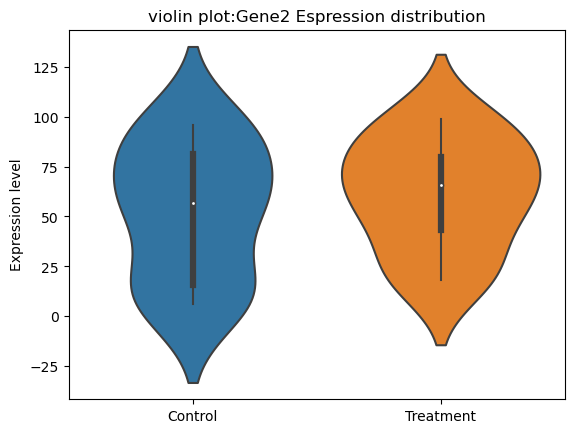

In [3]:
gene="Gene2"
gene_row=data[data["Gene"]==gene].iloc[0]

data=[gene_row[control_cols].values,gene_row[treatment_cols].values]

sns.violinplot(data=data)
plt.xticks([0,1],["Control","Treatment"])
plt.ylabel("Expression level")
plt.title(f"violin plot:{gene} Espression distribution")
plt.show()

In [4]:
from upsetplot import UpSet, from_memberships
